In [45]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import os

print(tf.__version__)

2.4.1


In [46]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train_all, y_train_all), (x_test, y_test) = fashion_mnist.load_data()
x_valid, x_train = x_train_all[:5000], x_train_all[5000:]
y_valid, y_train = y_train_all[:5000], y_train_all[5000:]

print(x_valid.shape, y_valid.shape)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(5000, 28, 28) (5000,)
(55000, 28, 28) (55000,)
(10000, 28, 28) (10000,)


In [47]:
from sklearn.preprocessing import StandardScaler

# normalize

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)
x_valid_scaled = scaler.transform(x_valid.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)
x_test_scaled = scaler.transform(x_test.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)

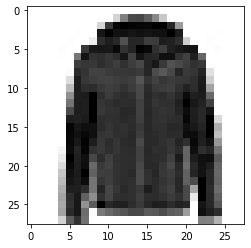

In [48]:
def show_single_image(img_arr):
    plt.imshow(img_arr, cmap="binary")
    plt.show()

show_single_image(x_train[0])

In [49]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="selu"))
model.add(keras.layers.Dense(100, activation="selu"))
model.add(keras.layers.AlphaDropout(rate=0.5))
model.add(keras.layers.Dense(10, activation="softmax"))

model.compile(loss=tf.losses.sparse_categorical_crossentropy,
              optimizer = 'adam',
              metrics=['accuracy'])

In [50]:
history = model.fit(x_train_scaled, y_train, epochs=10, validation_data=(x_valid_scaled, y_valid), batch_size=64, callbacks=[keras.callbacks.EarlyStopping(patience=5, min_delta=1e-3)])

Epoch 1/10
860/860 [==============================] - 2s 2ms/step - loss: 0.7468 - accuracy: 0.7399 - val_loss: 0.5386 - val_accuracy: 0.8316
Epoch 2/10
860/860 [==============================] - 2s 2ms/step - loss: 0.4520 - accuracy: 0.8364 - val_loss: 0.5170 - val_accuracy: 0.8582
Epoch 3/10
860/860 [==============================] - 1s 2ms/step - loss: 0.3992 - accuracy: 0.8563 - val_loss: 0.4738 - val_accuracy: 0.8704
Epoch 4/10
860/860 [==============================] - 1s 2ms/step - loss: 0.3728 - accuracy: 0.8647 - val_loss: 0.4652 - val_accuracy: 0.8800
Epoch 5/10
860/860 [==============================] - 2s 2ms/step - loss: 0.3531 - accuracy: 0.8708 - val_loss: 0.4977 - val_accuracy: 0.8802
Epoch 6/10
860/860 [==============================] - 2s 2ms/step - loss: 0.3305 - accuracy: 0.8796 - val_loss: 0.4508 - val_accuracy: 0.8890
Epoch 7/10
860/860 [==============================] - 2s 2ms/step - loss: 0.3214 - accuracy: 0.8816 - val_loss: 0.5025 - val_accuracy: 0.8826
Epoch 

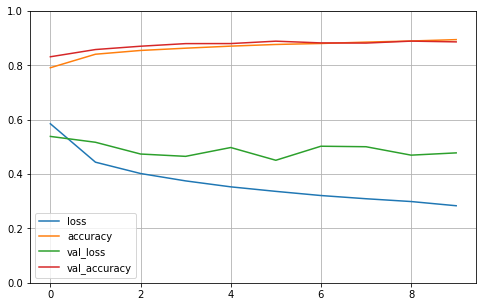

In [51]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.ylim(0, 1)

plot_learning_curves(history)

In [52]:
model.evaluate(x_test_scaled, y_test)

313/313 [==============================] - 0s 779us/step - loss: 0.5241 - accuracy: 0.8790


[0.5240747332572937, 0.8790000081062317]

In [53]:
model.save('fashion_minist_model.h5')

In [54]:
new_model = keras.models.load_model('fashion_minist_model.h5')

In [55]:
new_model.to_json()

'{"class_name": "Sequential", "config": {"name": "sequential_4", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 28, 28], "dtype": "float32", "sparse": false, "ragged": false, "name": "flatten_4_input"}}, {"class_name": "Flatten", "config": {"name": "flatten_4", "trainable": true, "batch_input_shape": [null, 28, 28], "dtype": "float32", "data_format": "channels_last"}}, {"class_name": "Dense", "config": {"name": "dense_12", "trainable": true, "dtype": "float32", "units": 300, "activation": "selu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_13", "trainable": true, "dtype": "float32", "units": 100, "activation": "selu", "use_bias": true, "kernel_initializer": 